In [1]:
import sys
sys.path.append('../../')

In [2]:
from scripts.utils import data_path, set_mpl, read_trentino, add_datetime_features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import geopandas as gpd
import contextily as ctx

%matplotlib widget

set_mpl()

matplotlib settings set
matplotlib settings set


In [3]:
telecom,energy,lines = read_trentino()


    Loading Trentino data from /Users/sdbykov/not_work/swarm_energAIser/0_data/.


    Telecommunication Data is not resampled, energy consumption data is resampled to 1H resolution.
    Telecommunication data (sms, calls, internet) are only for grid cells with energy consumption data.
    Telecommunication data is for country-code 39 (Italy).

    reutrns:
    df_telecom: pd.DataFrame with telecom data (sms, calls, internet)  with arbitrary scale. 
    df_line_energy: pd.DataFrame with line energy consumption data. Index - datetime, columns - consumption for each line
    df_line_location: pd.DataFrame with line location data. Index - cell ID, LINESET - line ID, NR_UBICAZIONI - number of customers
    
    For the location of grid cells see geojson file in the same folder (trentino-grid.geojson).

    


# plot grid

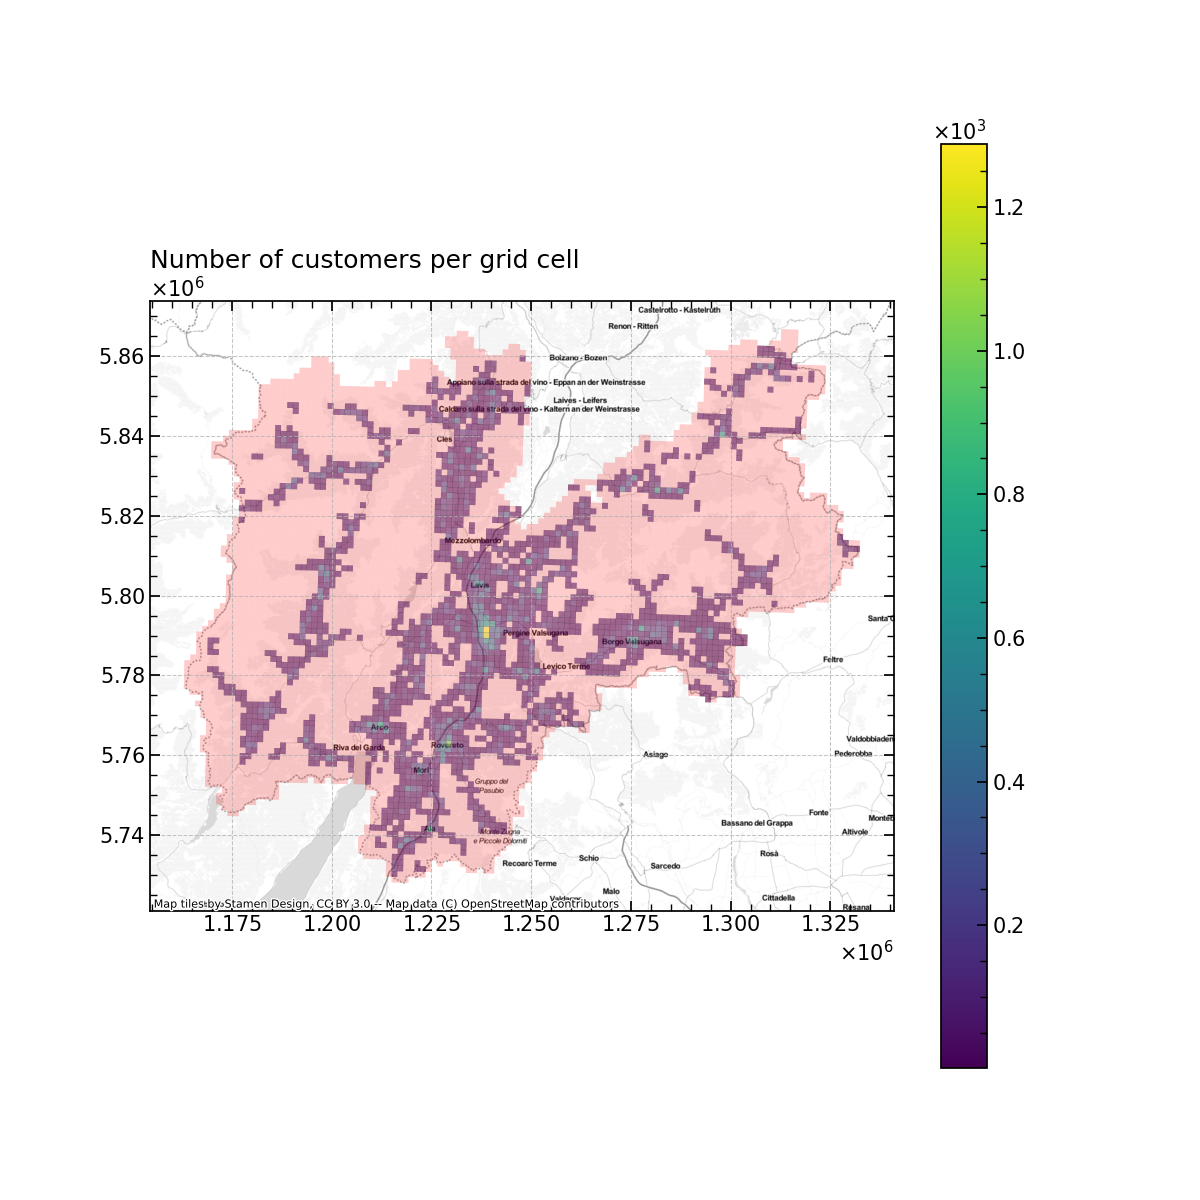

In [4]:

#see also web browser viewer of geojson files: https://geojson.io/
gridfile = data_path+'Trentino_drive/trentino-grid.geojson'
grid = gpd.read_file(gridfile)
grid = grid.to_crs(epsg=3857)


grid['NR_UBICAZIONI'] = grid['cellId'].map(lines.reset_index(drop = False, inplace = False).groupby('SQUAREID')['NR_UBICAZIONI'].sum())

fig,  ax =  plt.subplots( figsize = (12,12))
grid.plot(ax = ax, color = 'r', alpha = 0.2)
grid.plot(ax = ax, column = 'NR_UBICAZIONI', legend = True, alpha = 0.5, cmap = 'viridis', edgecolor = 'k', linewidth = 0.1)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)


ax.set_title('Number of customers per grid cell')
plt.show()


# Explore the data

In [20]:
example_cellID = 4424
LINESET = ['DG1000821']
display(lines.loc[example_cellID])


energy_cell = energy[LINESET]
telecom_cell = telecom.query('CellID == @example_cellID') 

LINESET          DG1000821
NR_UBICAZIONI          187
Name: 4424, dtype: object

<AxesSubplot: xlabel='date'>

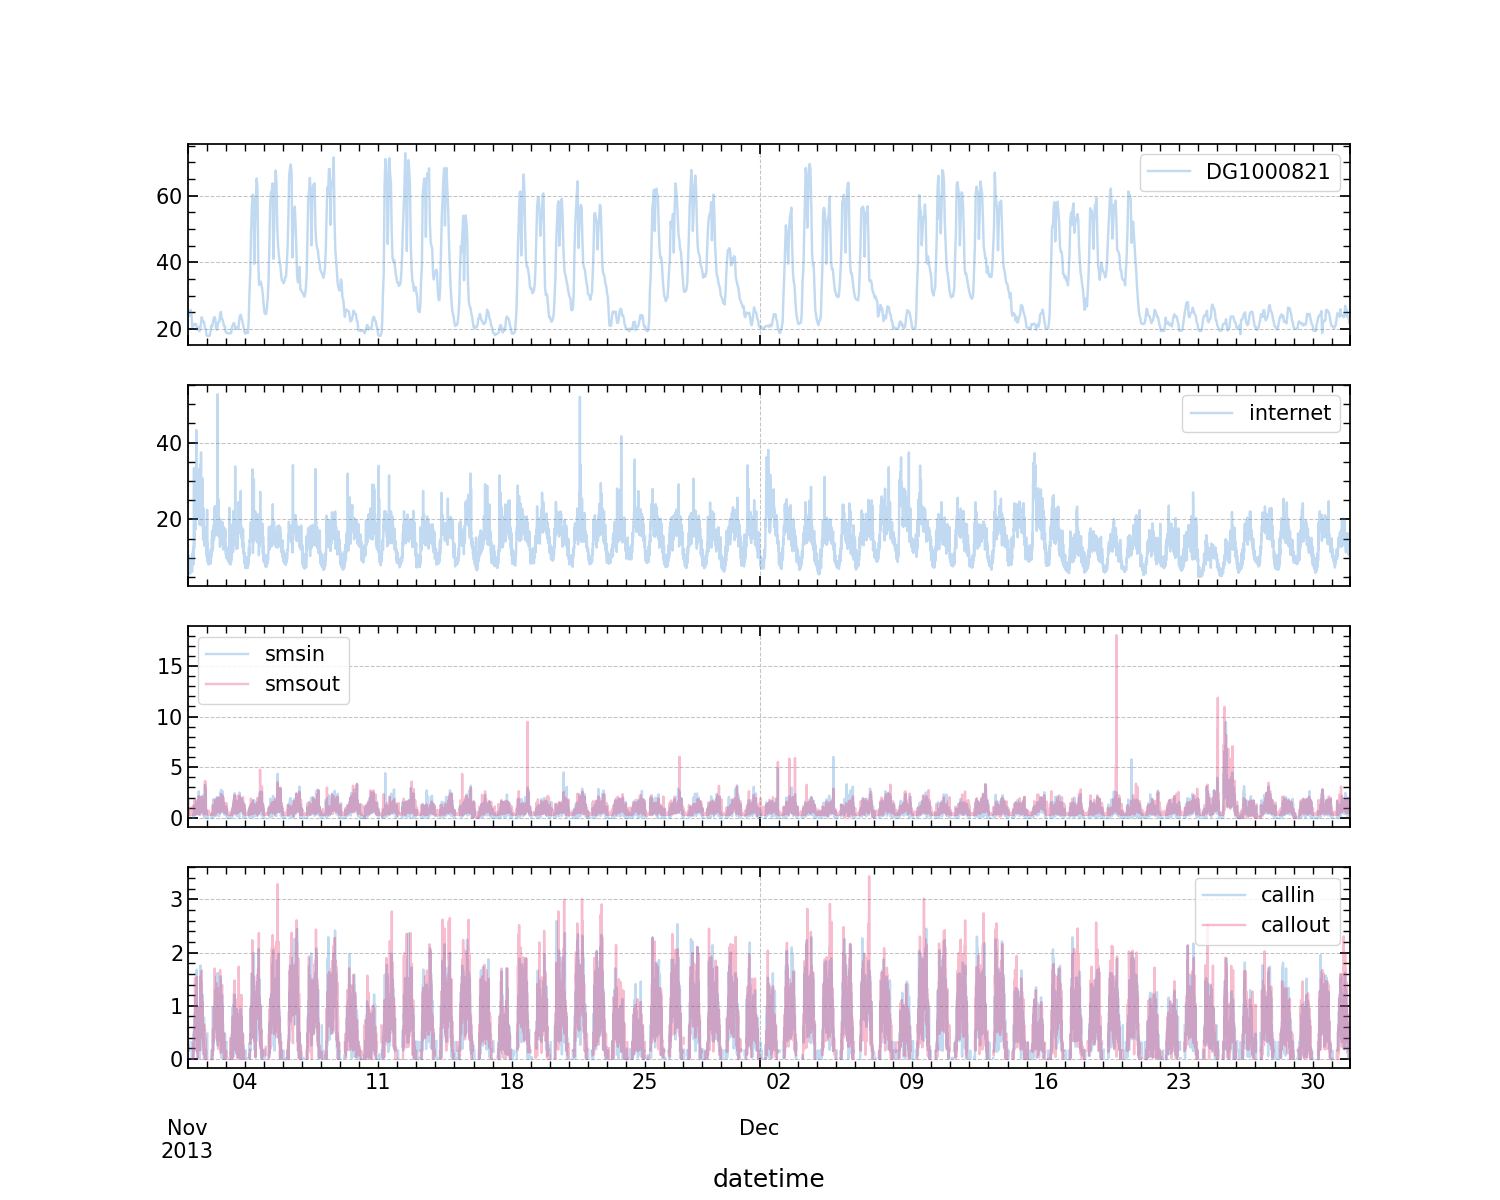

In [21]:
fig,  axs =  plt.subplots(4,  figsize = (15,12), sharex = True)
axs = axs.flatten()

telecom_cell[['internet']].plot(ax = axs[1],  alpha = 0.3)
telecom_cell[['smsin',	'smsout']].plot(ax = axs[2],  alpha = 0.3)
telecom_cell[['callin',	'callout']].plot(ax = axs[3],  alpha = 0.3)
energy_cell.plot(ax = axs[0],  alpha = 0.3)